# Ellipse Properties

Some useful properties of an ellipse.

# Code

In [52]:
%matplotlib inline

In [53]:
import math
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt


class Ellipse:

    def __init__(self, a, b, phi, x, y):
        self.a = a
        self.b = b
        self.phi = phi
        self.x = x
        self.y = y

    def point(self, t):
        x = self.a * math.cos(self.phi) * math.cos(t) - \
            self.b * math.sin(self.phi) * math.sin(t) + self.x
        y = self.a * math.sin(self.phi) * math.cos(t) + \
            self.b * math.cos(self.phi) * math.sin(t) + self.y
        return x, y

    def slope(self, t):
        x = self.a * math.cos(self.phi) * math.sin(t) + \
            self.b * math.sin(self.phi) * math.cos(t)
        y = self.a * math.sin(self.phi) * math.sin(t) - \
            self.b * math.cos(self.phi) * math.cos(t)
        return x, y

    def curvature(self, t):
        k = (self.a * self.b) / ((self.a) ** 2.0 * (math.sin(t)) ** 2.0 + \
                                 (self.b) ** 2.0 * (math.cos(t)) ** 2.0) ** (1.5)
        return k

    def nearest_point(self, x, y):
        a = self.a
        b = self.b
        
        # Rotate the point into csys where ellipse is centered at 0 and a,b are along x, y axes
        rx = (y - self.y) * math.sin(self.phi) + \
             (x - self.x) * math.cos(self.phi)
        ry = (y - self.y) * math.cos(self.phi) - \
             (x - self.x) * math.sin(self.phi)

        if rx == 0 and ry == 0:
            # Degenerate point in dead center of ellipse, just return first valid answer
            return (self.a, 0)

        # Polynomial coefficients in terms of t (t^4, t^3, etc...)
        ps = [1,
              -2 * (a*a + b*b),
              a**4 + b**4 + 4 * a*a * b*b - b*b * ry*ry - a*a * rx*rx,
              -2 * a*a * b*b *(a*a + b*b - rx*rx - ry*ry),
              a*a * b*b * (a*a * b*b - b*b * rx*rx - a*a * ry*ry)]

        # Solve roots and take minimum real root (nearest point)
        roots = np.roots(ps)
        real_roots = [root for root in roots if np.imag(root) == 0.0]
        t = np.real(min(real_roots))

        # Point in rotated space
        er_x = a ** 2 * rx / (a ** 2 - t)
        er_y = b ** 2 * ry / (b ** 2 - t)

        # Rotate point back into original space
        xsr = er_x * math.cos(self.phi) - \
              er_y * math.sin(self.phi) + self.x
        ysr = er_x * math.sin(self.phi) + \
              er_y * math.cos(self.phi) + self.y

        return xsr, ysr

#Test Ellipse

In [54]:
e = Ellipse(1, 4, 0.34 * np.pi, 2, 4)
ts = np.linspace(0.0, 2 * np.pi, 100)

#Point & Slope

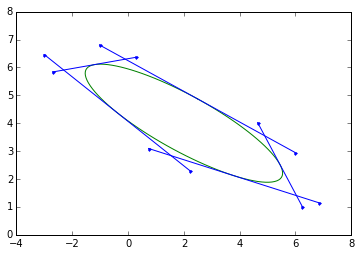

In [55]:
points = [e.point(t) for t in ts]
plt.plot([p[0] for p in points], [p[1] for p in points], 'g')

# Slope at point
for t in ts[::20]:
    x, y = e.point(t)
    vx, vy = e.slope(t)
    x0, y0 = x + vx, y + vy
    x1, y1 = x - vx, y - vy
    plt.plot([x0, x1], [y0, y1], 'b.-')
plt.axes().set_aspect('equal', 'datalim')
plt.show()

#Curvature

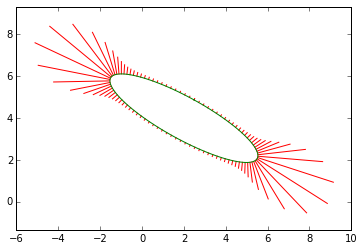

In [56]:
cs = [e.curvature(t) for t in ts]
vs = [np.array(e.slope(t)) / la.norm(np.array(e.slope(t))) for t in ts]
rs = [c * v for c, v in zip(cs, vs)]

for point, rs in zip(points, rs):
    plt.plot([point[0], point[0] - rs[1]], [point[1], point[1] + rs[0]], 'r')

plt.plot([p[0] for p in points], [p[1] for p in points], 'g')
plt.axes().set_aspect('equal', 'datalim')
plt.show()

#Nearest Neighbor

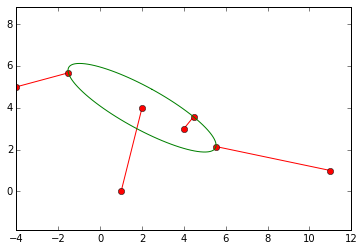

In [60]:
rx, ry = 11, 1
nx, ny = e.nearest_point(rx, ry)
plt.plot([rx, nx], [ry, ny], 'ro-')

rx, ry = 4, 3
nx, ny = e.nearest_point(rx, ry)
plt.plot([rx, nx], [ry, ny], 'ro-')

rx, ry = -4, 5
nx, ny = e.nearest_point(rx, ry)
plt.plot([rx, nx], [ry, ny], 'ro-')

# Center point is an anomaly, need to add check.
rx, ry = 2, 4
nx, ny = e.nearest_point(rx, ry)
plt.plot([rx, nx], [ry, ny], 'ro-')

plt.plot([p[0] for p in points], [p[1] for p in points], 'g')
plt.axes().set_aspect('equal', 'datalim')
plt.show()